Trabalho de KNN - JADER GOMES

In [31]:
import numpy as np
from sklearn import datasets 

In [82]:
class KNNClassifier(object):
    def __init__(self, n=1):
        self.X_train = None
        self.Y_train = None
        self.n = n
        
    def dist_euc(self, a, b):
        dist = DistanceMetric.get_metric('euclidean').pairwise([a],[b])[0][0]
        return dist
    
    def closest(self, row, k):
        dist = [(self.dist_euc(row, item)) for index,item in enumerate(self.X_train)]
        dist.sort(key = lambda x:x[1])
        viz = []
        for i in range(k):
            viz.append(self.Y_train[dist[i][0]])
            
        classe = Counter(viz).most_common(1)[0][0]
        
        return classe
    
    def fit(self, training_data, training_labels):
        self.X_train = training_data
        self.Y_train = training_labels
        
    def predict(self, to_classify, k=3):
        predictions = []
        for row in to_classify:
            label = self.closest(row,k)
            predictions.append(label)
            
        return predictions

In [33]:
import pandas as pd

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df['Age'] = df.Age.fillna(df.Age.mean())
df = df.where((pd.notnull(df)),0)
for f in ['Sex','Embarked']:
    df[f] = df[f].astype('category')
    df[f] = df[f].cat.codes
    
df.head()

AttributeError: 'DataFrame' object has no attribute 'Age'

In [6]:
df['age'] = df.Age.fillna(df.Age.mean())
df = df.where((pd.notnull(df)),0)
for f in ['sex','embarked']:
    df[f] = df[f].astype('category')
    df[f] = df[f].cat.codes
    
df.head()

AttributeError: 'DataFrame' object has no attribute 'Age'

In [7]:
df['age'] = df.age.fillna(df.age.mean())
df = df.where((pd.notnull(df)),0)
for f in ['sex','embarked']:
    df[f] = df[f].astype('category')
    df[f] = df[f].cat.codes
    
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,3
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,3
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,3
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,3


In [1]:
df.dtypes

NameError: name 'df' is not defined

In [23]:
df = pd.read_csv('train.csv')
print(df)

     survived  pclass                                               name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
5           0       3                                   Moran, Mr. James   
6           0       1                            McCarthy, Mr. Timothy J   
7           0       3                     Palsson, Master. Gosta Leonard   
8           1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9           1       2                Nasser, Mrs. Nicholas (Adele Achem)   
10          1       3                    Sandstrom, Miss. Marguerite Rut   
11          1       1                           Bonnell, Miss. Elizabeth   
12          

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('train.csv')
print(df)

     survived  pclass                                               name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
5           0       3                                   Moran, Mr. James   
6           0       1                            McCarthy, Mr. Timothy J   
7           0       3                     Palsson, Master. Gosta Leonard   
8           1       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9           1       2                Nasser, Mrs. Nicholas (Adele Achem)   
10          1       3                    Sandstrom, Miss. Marguerite Rut   
11          1       1                           Bonnell, Miss. Elizabeth   
12          

In [5]:
df.dtypes

survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

In [6]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
from sklearn.preprocessing import LabelEncoder

In [24]:
df.drop(labels=["name", "ticket"], axis=1, inplace=True)

X_train = df.loc[:,"pclass":]
y_train = df[["survived"]]

LE = LabelEncoder()
for feature in ["sex", "cabin", "embarked"]:
    X_train[[feature]] = X_train[[feature]].astype(str)
    LE.fit(X_train.loc[:,feature])
    X_train[[feature]] = LE.transform(X_train.loc[:,feature])
    
X_train.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
0,3,1,22.0,1,0,7.2500,147,2
1,1,0,38.0,1,0,71.2833,81,0
2,3,0,26.0,0,0,7.9250,147,2
3,1,0,35.0,1,0,53.1000,55,2
4,3,1,35.0,0,0,8.0500,147,2


In [22]:
y_train.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [25]:
corrMatrix = X_train.corr()
corrMatrix

,pclass,sex,age,sibsp,parch,fare,cabin,embarked
pclass,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.684121,0.157112
sex,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.096681,0.104057
age,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.252331,-0.025252
sibsp,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.043593,0.066654
parch,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.028324,0.038322
fare,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.503355,-0.221226
cabin,0.684121,0.096681,-0.252331,0.043593,-0.028324,-0.503355,1.000000,0.193205
embarked,0.157112,0.104057,-0.025252,0.066654,0.038322,-0.221226,0.193205,1.000000


In [29]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train.values.flatten(), test_size=0.25)

In [36]:
print(X_train)

     pclass  sex   age  sibsp  parch      fare  cabin  embarked
4         3    1  35.0      0      0    8.0500    147         2
740       1    1   NaN      0      0   30.0000    105         2
294       3    1  24.0      0      0    7.8958    147         2
815       1    1   NaN      0      0    0.0000     16         2
799       3    0  30.0      1      1   24.1500    147         2
75        3    1  25.0      0      0    7.6500    140         2
715       3    1  19.0      0      0    7.6500    140         2
355       3    1  28.0      0      0    9.5000    147         2
240       3    0   NaN      1      0   14.4542    147         0
132       3    0  47.0      1      0   14.5000    147         2
753       3    1  23.0      0      0    7.8958    147         2
15        2    0  55.0      0      0   16.0000    147         2
667       3    1   NaN      0      0    7.7750    147         2
521       3    1  22.0      0      0    7.8958    147         2
631       3    1  51.0      0      0    

In [37]:
from sklearn.neighbors import KNeighborsClassifier


In [38]:
knn = KNeighborsClassifier()

In [40]:
resultado = knn.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [41]:
print(X_test)

     pclass  sex   age  sibsp  parch      fare  cabin  embarked
840       3    1  20.0      0      0    7.9250    147         2
612       3    0   NaN      1      0   15.5000    147         1
679       1    1  36.0      0      1  512.3292     34         0
745       1    1  70.0      1      1   71.0000     20         2
761       3    1  41.0      0      0    7.1250    147         2
734       2    1  23.0      0      0   13.0000    147         2
340       2    1   2.0      1      1   26.0000    141         2
736       3    0  48.0      1      3   34.3750    147         2
427       2    0  19.0      0      0   26.0000    147         2
649       3    0  23.0      0      0    7.5500    147         2
114       3    0  17.0      0      0   14.4583    147         0
203       3    1  45.5      0      0    7.2250    147         0
530       2    0   2.0      1      1   26.0000    147         2
402       3    0  21.0      1      0    9.8250    147         2
361       2    1  29.0      1      0   2

In [42]:
X_test["age"] = X_test.age.fillna(X_test.age.mean())

In [43]:
print(X_test)

     pclass  sex        age  sibsp  parch      fare  cabin  embarked
840       3    1  20.000000      0      0    7.9250    147         2
612       3    0  30.376229      1      0   15.5000    147         1
679       1    1  36.000000      0      1  512.3292     34         0
745       1    1  70.000000      1      1   71.0000     20         2
761       3    1  41.000000      0      0    7.1250    147         2
734       2    1  23.000000      0      0   13.0000    147         2
340       2    1   2.000000      1      1   26.0000    141         2
736       3    0  48.000000      1      3   34.3750    147         2
427       2    0  19.000000      0      0   26.0000    147         2
649       3    0  23.000000      0      0    7.5500    147         2
114       3    0  17.000000      0      0   14.4583    147         0
203       3    1  45.500000      0      0    7.2250    147         0
530       2    0   2.000000      1      1   26.0000    147         2
402       3    0  21.000000      1

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [49]:
X_train["age"] = X_train.age.fillna(X_train.age.mean())

In [50]:
print(y_train)

[0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1
 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1
 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1
 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1
 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1
 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0
 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1
 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1
 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 1 1 0 1 1 1 1 0 0 1 

In [52]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [53]:
res = knn.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score, classification_report

In [57]:
accuracy_score(y_test, res)

0.69955156950672648

In [58]:
scores = []
ks = range(1,120, 4)
n_ks = len(ks)

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))

In [60]:
import matplotlib.pyplot as plt

/home/jader/miniconda3/envs/aula/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


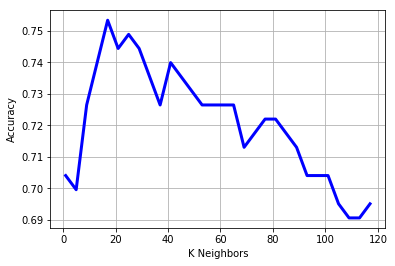

In [61]:
fig,ax = plt.subplots()
ax.plot(ks,scores,'b',linewidth=3)
ax.set_ylabel('Accuracy')
ax.set_xlabel('K Neighbors')

plt.grid()

In [62]:
max(scores)

0.75336322869955152

In [63]:
min(scores)

0.6905829596412556

In [80]:
bestK = scores.index(max(scores))

bestK = bestK*4 +1
bestK

17

In [66]:
knn = KNeighborsClassifier(n_neighbors=bestK)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

In [67]:
result = knn.predict(X_test)

In [69]:
report = classification_report(knn.predict(X_test), y_test)

In [70]:
print(report)

             precision    recall  f1-score   support

          0       0.90      0.75      0.82       164
          1       0.52      0.76      0.62        59

avg / total       0.80      0.75      0.77       223



In [83]:
pred = knn.predict(X_test, bestK)

AttributeError: 'KNNClassifier' object has no attribute 'k_closest'

In [89]:
from sklearn.neighbors import DistanceMetric

class KNNClassifier(object):
    def __init__(self, n=1):
        self.X_train = None
        self.Y_train = None
        self.n = n
        
    def dist_euc(self, a, b):
        dist = DistanceMetric.get_metric('euclidean').pairwise([a],[b])[0][0]
        return dist
    
    def closest(self, row, k):
        dist = [(self.dist_euc(row, item)) for index,item in enumerate(self.X_train)]
        dist.sort(key = lambda x:x[1])
        viz = []
        for i in range(k):
            viz.append(self.Y_train[dist[i][0]])
            
        classe = Counter(viz).most_common(1)[0][0]
        
        return classe
    
    def fit(self, training_data, training_labels):
        self.X_train = training_data
        self.Y_train = training_labels
        
    def predict(self, to_classify, k=3):
        predictions = []
        for row in to_classify:
            label = self.closest(row,k)
            predictions.append(label)
            
        return predictions

In [90]:
knn = KNNClassifier()

In [91]:
knn.fit(X_train.values, y_train)

In [92]:
res2= knn.predict(X_test.values, k=bestK)

IndexError: invalid index to scalar variable.

tentei!!! ;/